<a href="https://colab.research.google.com/github/akshat-646/IRIS_CLASSFICATION_MODEL/blob/main/Iris_Classification_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#                   **IRIS CLASSIFICATION MODEL**

## **1.Import Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# **2.Load an Explore the Data**

In [ ]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [ ]:
print("Dataset shape:", df.shape)

Dataset shape: (150, 6)


In [ ]:
print("\nFirst 5 rows:")
print(df.head())


First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  


In [ ]:
print("\nDataset info:")
print(df.info())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
print("\nSpecies distribution:")
print(df['species_name'].value_counts())


Species distribution:
species_name
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


# **3.Data Visualization**

Text(0.5, 1.0, 'Sepal Length vs Width')

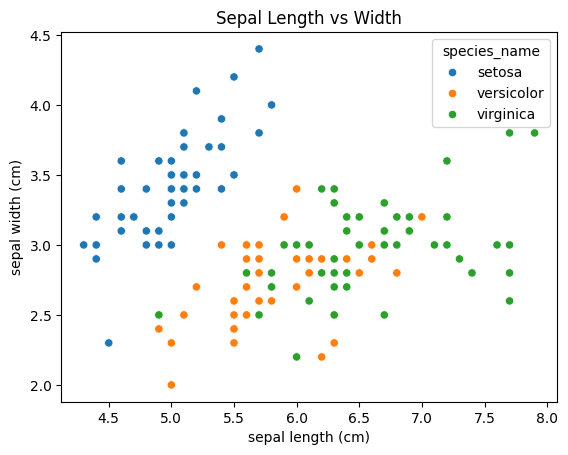

In [ ]:
plt.subplot(1, 1, 1)
sns.scatterplot(data=df, x='sepal length (cm)', y='sepal width (cm)', hue='species_name')
plt.title('Sepal Length vs Width')

Text(0.5, 1.0, 'Petal Length vs Width')

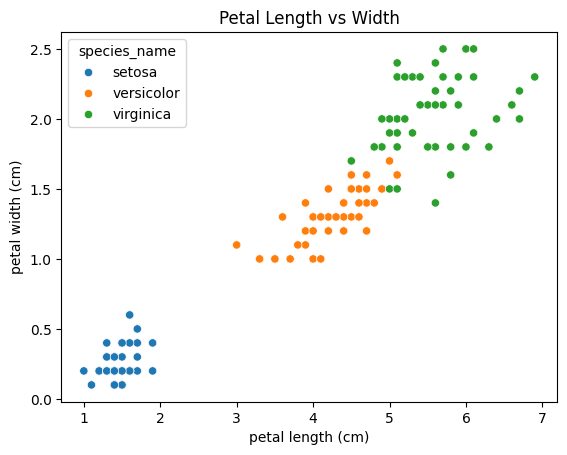

In [ ]:
plt.subplot(1, 1, 1)
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='species_name')
plt.title('Petal Length vs Width')

([0, 1, 2],
 [Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')])

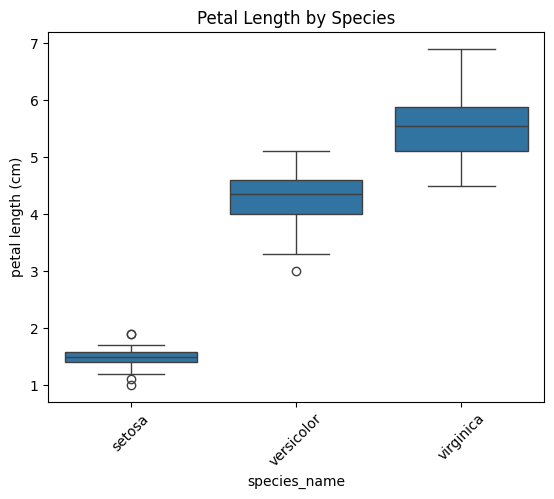

In [ ]:
sns.boxplot(data=df, x='species_name', y='petal length (cm)')
plt.title('Petal Length by Species')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')])

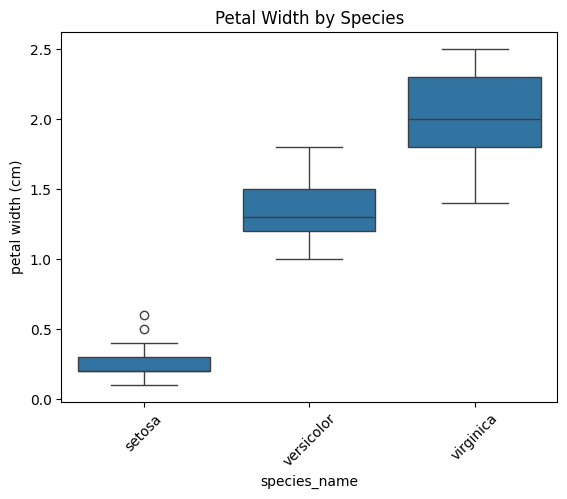

In [ ]:
sns.boxplot(data=df, x='species_name', y='petal width (cm)')
plt.title('Petal Width by Species')
plt.xticks(rotation=45)

# **4.Prepare the Data for ML**

In [ ]:
X = iris.data  # Features (measurements)
y = iris.target  # Target (species)

print("Features shape:", X.shape)
print("Target shape:", y.shape)

Features shape: (150, 4)
Target shape: (150,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 105 samples
Testing set: 45 samples


# **5.Train the ML Model**

In [ ]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
print("Model training completed!")

Model training completed!


# **6.Make Prediction and Evaluate the Model**

In [ ]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f} ({accuracy*100:.1f}%)")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Accuracy: 0.96 (95.6%)

Detailed Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.88      1.00      0.94        15
   virginica       1.00      0.87      0.93        15

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



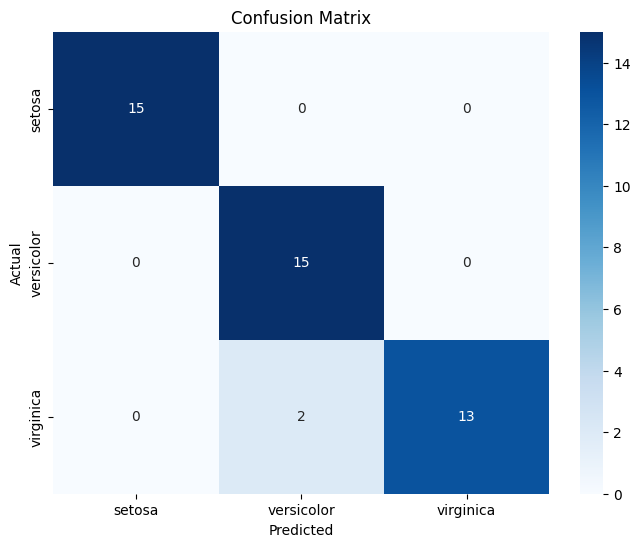

In [ ]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# **7.Test with New Data**

In [ ]:
new_flower = [[5.1, 3.5, 1.4, 0.2]]
prediction = model.predict(new_flower)
predicted_species = iris.target_names[prediction[0]]
print(f"New flower measurements: {new_flower[0]}")
print(f"Predicted species: {predicted_species}")

New flower measurements: [5.1, 3.5, 1.4, 0.2]
Predicted species: setosa


In [ ]:
probabilities = model.predict_proba(new_flower)
print("\nPrediction probabilities:")
for i, prob in enumerate(probabilities[0]):
    print(f"{iris.target_names[i]}: {prob:.3f}")


Prediction probabilities:
setosa: 1.000
versicolor: 0.000
virginica: 0.000


# **8.Feature Analysis**

In [ ]:
feature_names = iris.feature_names
print("Features used for prediction:")
for i, feature in enumerate(feature_names):
    print(f"{i+1}. {feature}")

Features used for prediction:
1. sepal length (cm)
2. sepal width (cm)
3. petal length (cm)
4. petal width (cm)


In [ ]:
sample_predictions = model.predict(X_test[:5])
print(f"\nFirst 5 test samples predictions:")
for i in range(5):
    actual = iris.target_names[y_test[i]]
    predicted = iris.target_names[sample_predictions[i]]
    print(f"Sample {i+1}: Predicted={predicted}, Actual={actual}")


First 5 test samples predictions:
Sample 1: Predicted=virginica, Actual=virginica
Sample 2: Predicted=versicolor, Actual=versicolor
Sample 3: Predicted=versicolor, Actual=virginica
Sample 4: Predicted=versicolor, Actual=versicolor
Sample 5: Predicted=virginica, Actual=virginica
